In [20]:
import pandas as pd
tmp = pd.read_csv('merged_data.csv', encoding='cp949')

# BMI 연산용 데이터만 남기고 연도별로 데이터 최소화

In [21]:
y = list(set(tmp['기준년도']))
for l in y:
    t = tmp[tmp['기준년도']==l][['신장(5cm단위)', '체중(5kg단위)', '성별']]
    t.columns = ['height', 'weight', 'sex']
    print(f'{l} : \n {t.head()} \n {t.info()}')
    t.to_csv(f'shortened_data_{l}.csv')

<class 'pandas.core.frame.DataFrame'>
Index: 1000000 entries, 0 to 999999
Data columns (total 3 columns):
 #   Column  Non-Null Count    Dtype
---  ------  --------------    -----
 0   height  1000000 non-null  int64
 1   weight  1000000 non-null  int64
 2   sex     1000000 non-null  int64
dtypes: int64(3)
memory usage: 30.5 MB
2018 : 
    height  weight  sex
0     160      60    2
1     170      55    1
2     165      70    1
3     150      45    2
4     145      50    2 
 None
<class 'pandas.core.frame.DataFrame'>
Index: 1000000 entries, 1000000 to 1999999
Data columns (total 3 columns):
 #   Column  Non-Null Count    Dtype
---  ------  --------------    -----
 0   height  1000000 non-null  int64
 1   weight  1000000 non-null  int64
 2   sex     1000000 non-null  int64
dtypes: int64(3)
memory usage: 30.5 MB
2019 : 
          height  weight  sex
1000000     165      65    1
1000001     155      45    2
1000002     160      70    1
1000003     170      60    1
1000004     170      70  

In [46]:
t['bmi'] = t['weight'] / ( t['height'] / 100 ) ** 2
t.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1000000 entries, 4000000 to 4999999
Data columns (total 4 columns):
 #   Column  Non-Null Count    Dtype  
---  ------  --------------    -----  
 0   height  1000000 non-null  int64  
 1   weight  1000000 non-null  int64  
 2   sex     1000000 non-null  int64  
 3   bmi     1000000 non-null  float64
dtypes: float64(1), int64(3)
memory usage: 38.1 MB


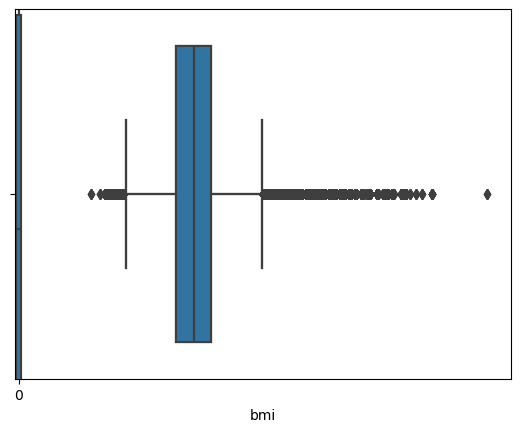

In [60]:
import seaborn as sns
import matplotlib.pyplot as plt
# sns.barplot(t['bmi'])
sns.boxplot(x = t['bmi'])
plt.show()

In [56]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

# 샘플 데이터 생성
np.random.seed(10)
data = np.random.normal(0, 1, 100)

# 특정 데이터 포인트
specific_data_point = 2.5

# 박스플롯 그리기
sns.boxplot(data=data)

# 특정 데이터 포인트의 위치 찾기
index = np.where(data == specific_data_point)[0][0]

# 특정 데이터 포인트 표시
plt.scatter(1, data[index], color='red', label='Specific Data Point')

plt.legend()  # 범례 표시
plt.show()


IndexError: index 0 is out of bounds for axis 0 with size 0